In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.tri as mtri

LSTM

Best hyperparameters found were:  {'embedding_num': 400, 'hidden_num': 200}(fixed) + emdedding_zie=50 per radical 0 200 step 30

LSTM-CRF

Best hyperparameters found were:  {'embedding_num': 250, 'hidden_num': 200}


In [2]:
df = pd.read_csv('results_df_LSTM no radical.csv')
df_2 = pd.read_csv('results_df_LSTM_CRF no radical.csv')

In [3]:
df

,trial_id,last_train_loss,last_train_f1,last_dev_loss,last_dev_f1,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,...,time_total_s,pid,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config.embedding_num,config.hidden_num
0,24e0d_00000,0.008052,0.967726,0.029962,0.955066,27.245104,True,NaN,NaN,1,...,27.245104,1256,LAPTOP-U2GSCB1O,127.0.0.1,27.245104,0,1,"0_embedding_num=100,hidden_num=100",100,100
1,24e0d_00001,0.007317,0.973588,0.001174,0.953816,28.480834,True,NaN,NaN,1,...,28.480834,25400,LAPTOP-U2GSCB1O,127.0.0.1,28.480834,0,1,"1_embedding_num=150,hidden_num=100",150,100
2,24e0d_00002,0.002711,0.977787,0.011377,0.954408,27.172298,True,NaN,NaN,1,...,27.172298,23068,LAPTOP-U2GSCB1O,127.0.0.1,27.172298,0,1,"2_embedding_num=200,hidden_num=100",200,100
3,24e0d_00003,0.000931,0.980510,0.002961,0.954737,26.043355,True,NaN,NaN,1,...,26.043355,23640,LAPTOP-U2GSCB1O,127.0.0.1,26.043355,0,1,"3_embedding_num=250,hidden_num=100",250,100
4,24e0d_00004,0.001785,0.983005,0.069369,0.955987,28.518696,True,NaN,NaN,1,...,28.518696,25864,LAPTOP-U2GSCB1O,127.0.0.1,28.518696,0,1,"4_embedding_num=300,hidden_num=100",300,100
5,24e0d_00005,0.004657,0.983528,0.022762,0.955132,27.616122,True,NaN,NaN,1,...,27.616122,4296,LAPTOP-U2GSCB1O,127.0.0.1,27.616122,0,1,"5_embedding_num=350,hidden_num=100",350,100
6,24e0d_00006,0.001668,0.984467,0.001208,0.953684,27.425627,True,NaN,NaN,1,...,27.425627,29344,LAPTOP-U2GSCB1O,127.0.0.1,27.425627,0,1,"6_embedding_num=400,hidden_num=100",400,100
7,24e0d_00007,0.004370,0.972140,0.005727,0.952961,27.278016,True,NaN,NaN,1,...,27.278016,27640,LAPTOP-U2GSCB1O,127.0.0.1,27.278016,0,1,"7_embedding_num=100,hidden_num=150",100,150
8,24e0d_00008,0.003022,0.978377,0.016811,0.953882,28.494759,True,NaN,NaN,1,...,28.494759,15924,LAPTOP-U2GSCB1O,127.0.0.1,28.494759,0,1,"8_embedding_num=150,hidden_num=150",150,150
9,24e0d_00009,0.004143,0.982777,0.043143,0.954605,26.876091,True,NaN,NaN,1,...,26.876091,1460,LAPTOP-U2GSCB1O,127.0.0.1,26.876091,0,1,"9_embedding_num=200,hidden_num=150",200,150


In [4]:
print(df.columns)

Index(['trial_id', 'last_train_loss', 'last_train_f1', 'last_dev_loss',
       'last_dev_f1', 'time_this_iter_s', 'done', 'timesteps_total',
       'episodes_total', 'training_iteration', 'experiment_id', 'date',
       'timestamp', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'experiment_tag', 'config.embedding_num',
       'config.hidden_num'],
      dtype='object')


In [5]:
df_2 

,trial_id,last_train_loss,last_train_f1,last_dev_loss,last_dev_f1,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,...,time_total_s,pid,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config.embedding_num,config.hidden_num
0,7f1b7_00000,0.060535,0.972944,0.057574,0.953816,568.593855,True,NaN,NaN,1.0,...,568.593855,32248,LAPTOP-U2GSCB1O,127.0.0.1,568.593855,0.0,1.0,"0_embedding_num=100,hidden_num=100",100,100
1,7f1b7_00001,0.149390,0.980845,0.159863,0.955197,577.774308,True,NaN,NaN,1.0,...,577.774308,32000,LAPTOP-U2GSCB1O,127.0.0.1,577.774308,0.0,1.0,"1_embedding_num=150,hidden_num=100",150,100
2,7f1b7_00002,0.035339,0.983769,0.095300,0.956974,567.988807,True,NaN,NaN,1.0,...,567.988807,5376,LAPTOP-U2GSCB1O,127.0.0.1,567.988807,0.0,1.0,"2_embedding_num=200,hidden_num=100",200,100
3,7f1b7_00003,0.084503,0.986036,0.044543,0.956382,574.190276,True,NaN,NaN,1.0,...,574.190276,21988,LAPTOP-U2GSCB1O,127.0.0.1,574.190276,0.0,1.0,"3_embedding_num=250,hidden_num=100",250,100
4,7f1b7_00004,0.113800,0.988799,0.112061,0.958355,551.096986,True,NaN,NaN,1.0,...,551.096986,24664,LAPTOP-U2GSCB1O,127.0.0.1,551.096986,0.0,1.0,"4_embedding_num=300,hidden_num=100",300,100
5,7f1b7_00005,0.031415,0.989618,0.087378,0.956382,549.169311,True,NaN,NaN,1.0,...,549.169311,2140,LAPTOP-U2GSCB1O,127.0.0.1,549.169311,0.0,1.0,"5_embedding_num=350,hidden_num=100",350,100
6,7f1b7_00006,0.070435,0.990946,0.184021,0.958289,547.211309,True,NaN,NaN,1.0,...,547.211309,11732,LAPTOP-U2GSCB1O,127.0.0.1,547.211309,0.0,1.0,"6_embedding_num=400,hidden_num=100",400,100
7,7f1b7_00007,0.063092,0.977317,0.362701,0.953026,546.520732,True,NaN,NaN,1.0,...,546.520732,1188,LAPTOP-U2GSCB1O,127.0.0.1,546.520732,0.0,1.0,"7_embedding_num=100,hidden_num=150",100,150
8,7f1b7_00008,0.150854,0.984078,0.449060,0.955000,545.511122,True,NaN,NaN,1.0,...,545.511122,27316,LAPTOP-U2GSCB1O,127.0.0.1,545.511122,0.0,1.0,"8_embedding_num=150,hidden_num=150",150,150
9,7f1b7_00009,0.121802,0.988545,0.094861,0.956974,546.037519,True,NaN,NaN,1.0,...,546.037519,12340,LAPTOP-U2GSCB1O,127.0.0.1,546.037519,0.0,1.0,"9_embedding_num=200,hidden_num=150",200,150


In [6]:
print(df_2.columns)

Index(['trial_id', 'last_train_loss', 'last_train_f1', 'last_dev_loss',
       'last_dev_f1', 'time_this_iter_s', 'done', 'timesteps_total',
       'episodes_total', 'training_iteration', 'experiment_id', 'date',
       'timestamp', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'experiment_tag', 'config.embedding_num',
       'config.hidden_num'],
      dtype='object')


In [7]:
df_need= df[['last_train_loss', 'last_train_f1', 'last_dev_loss', 'last_dev_f1', 'config.embedding_num', 'config.hidden_num']]
df_need_2= df_2[['last_train_loss', 'last_train_f1', 'last_dev_loss', 'last_dev_f1', 'config.embedding_num', 'config.hidden_num']]
df_need

,last_train_loss,last_train_f1,last_dev_loss,last_dev_f1,config.embedding_num,config.hidden_num
0,0.008052,0.967726,0.029962,0.955066,100,100
1,0.007317,0.973588,0.001174,0.953816,150,100
2,0.002711,0.977787,0.011377,0.954408,200,100
3,0.000931,0.980510,0.002961,0.954737,250,100
4,0.001785,0.983005,0.069369,0.955987,300,100
5,0.004657,0.983528,0.022762,0.955132,350,100
6,0.001668,0.984467,0.001208,0.953684,400,100
7,0.004370,0.972140,0.005727,0.952961,100,150
8,0.003022,0.978377,0.016811,0.953882,150,150
9,0.004143,0.982777,0.043143,0.954605,200,150


In [8]:
# df 1
last_dev_f1=df_need['last_dev_f1'].to_numpy()
last_dev_loss=df_need['last_dev_loss'].to_numpy()
last_train_f1=df_need['last_train_f1'].to_numpy()
last_train_loss=df_need['last_train_loss'].to_numpy()

# df 2
last_dev_f1_2=df_need_2['last_dev_f1'].to_numpy()
last_dev_loss_2=df_need_2['last_dev_loss'].to_numpy()
last_train_f1_2=df_need_2['last_train_f1'].to_numpy()
last_train_loss_2=df_need_2['last_train_loss'].to_numpy()

# never changes 
embedding_num=df_need['config.embedding_num'].to_numpy()
hidden_num=df_need['config.hidden_num'].to_numpy()

In [9]:
# fig = plt.figure(figsize=(4,4))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(2,3,4) # plot the point (2,3,4) on the figure
# plt.show()
embedding_num
hidden_num
last_dev_f1

array([0.95506579, 0.95381579, 0.9544079 , 0.95473684, 0.95598684,
       0.95513158, 0.95368421, 0.95296053, 0.95388158, 0.95460526,
       0.955     , 0.95611842, 0.95348684, 0.95407895, 0.95414474,
       0.95355263, 0.95710526, 0.95677632, 0.95460526, 0.95473684,
       0.95756579, 0.9531579 , 0.95210526, 0.95506579, 0.95519737,
       0.95592105, 0.95657895, 0.95585526, 0.95381579, 0.95480263,
       0.95651316, 0.9531579 , 0.95519737, 0.95394737, 0.95657895,
       0.95730263, 0.95230263, 0.95407895, 0.95506579, 0.9531579 ,
       0.95493421, 0.95460526, 0.95572368, 0.95052632, 0.95486842,
       0.95421053, 0.95480263, 0.95605263, 0.95736842])

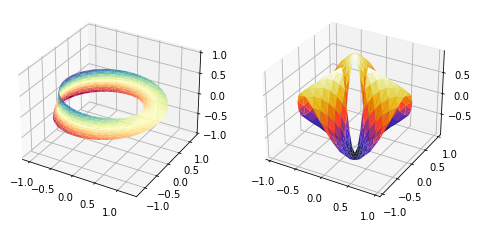

In [10]:
"""
===========================
More triangular 3D surfaces
===========================

Two additional examples of plotting surfaces with triangular mesh.

The first demonstrates use of plot_trisurf's triangles argument, and the
second sets a Triangulation object's mask and passes the object directly
to plot_trisurf.
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


fig = plt.figure(figsize=plt.figaspect(0.5))

#============
# First plot
#============

# Make a mesh in the space of parameterisation variables u and v
u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=50)
v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.set_zlim(-1, 1)


#============
# Second plot
#============

# Make parameter spaces radii and angles.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi/n_angles

# Map radius, angle pairs to x, y, z points.
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(3*angles)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = mtri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = xmid**2 + ymid**2 < min_radius**2
triang.set_mask(mask)

# Plot the surface.
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(triang, z, cmap=plt.cm.CMRmap)


plt.show()

In [5]:
def draw_plane(df_need):
    x = df_need['config.embedding_num'].to_numpy()
    y = df_need['config.hidden_num'].to_numpy()
    
    # z
    z1 = df_need['last_dev_f11'].to_numpy()
    z2 = df_need['last_dev_loss1'].to_numpy()
    z3 = df_need['last_train_f1'].to_numpy()
    z4 = df_need['last_train_loss'].to_numpy()
    
    # draw
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ##surface.
    # df 1
#     surf = ax.plot_trisurf(x, y, z1, linewidth=3, antialiased=False,label='last_dev_f1_surface')
    ################################################
    # Create the Triangulation; no triangles so Delaunay triangulation created.
    triang = mtri.Triangulation(x, y)

    # Mask off unwanted triangles.
#     xmid = x[triang.triangles].mean(axis=1)
#     ymid = y[triang.triangles].mean(axis=1)
#     mask = xmid**2 + ymid**2 < min_radius**2
#     triang.set_mask(mask)

    # Plot the surface.
    #ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_trisurf(triang, z1, cmap=plt.cm.CMRmap)
    #######################################################################
    
    # points
    ax.scatter(x,y,z1, label='last_dev_f1_scatter', color='r')
    # lines 
#     ax.plot(x,y,z1,marker='1', linestyle='-', color='r', label='last_dev_f1', linewidth=3)
    
    ax.set_title("Parameter tuning - no radical")
    ax.set_xlabel("Embedding number")
    ax.set_ylabel("Hidden number")
    ax.set_zlabel("Last dev f1 score")
    
    fig.set_size_inches(15, 15)

#     ax.legend(loc="best")
    # plot_surface 

    plt.show()

    
def draw_graph(df_need, one):
    if one:
        x = df_need['config.embedding_onerad_num'].to_numpy()
    else:
        x = df_need['config.embedding_threerad_num'].to_numpy()
    # z
    z1 = df_need['last_dev_f11'].to_numpy()
    z2 = df_need['last_dev_loss1'].to_numpy()
    z3 = df_need['last_dev_f1_ave'].to_numpy()
    z4 = df_need['last_dev_loss_ave'].to_numpy()
    
    # draw
    f = plt.figure(figsize=(10,4))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)

    #title = f'{model_} model on {dataset_} dataset'
    #f.suptitle('\n'.join(textwrap.wrap(title, 75)))

    ax1.plot(x, z1, marker='1', linestyle='-', color='r', label='dev_f1_last', linewidth=1)
    ax1.plot(x, z3, marker='1', linestyle='-', color='b', label='dev_f1_ave', linewidth=1)
    ax2.plot(x, z2, marker='2', linestyle='-', color='r', label='dev_loss_last', linewidth=1)
    ax2.plot(x, z4, marker='2', linestyle='-', color='b', label='dev_loss_ave', linewidth=1)
    
    ax1.set(xlabel='embedding number',ylabel='f1 scores')
    ax1.set_title('model f1 score')
    ax1.legend(loc='best')
    
    ax2.set(xlabel='embedding number',ylabel='loss')
    ax2.set_title('model loss')
    ax2.legend(loc='best')

    plt.show()

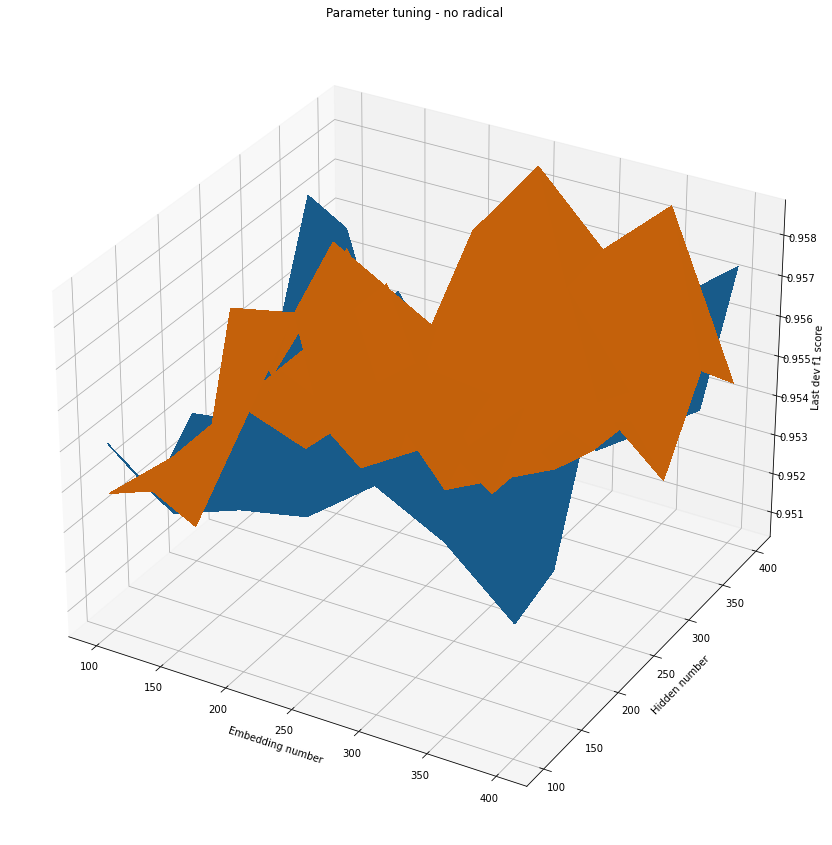

In [12]:
x = embedding_num
y = hidden_num

# df 1
z1 = last_dev_f1
z2 = last_dev_loss
z3 = last_train_f1
z4 = last_train_loss

# df 2 
z1_2 = last_dev_f1_2
z2_2 = last_dev_loss_2
z3_2 = last_train_f1_2
z4_2 = last_train_loss_2

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

## lines 
# df 1
# ax.plot(x,y,z1,marker='1', linestyle='-', color='r', label='last_dev_f1', linewidth=1)
# ax.scatter(x,y,z1, label='last_dev_f1', color='r')
# ax.plot(x,y,z2,marker='1', linestyle='--', color='r', label='last_dev_loss', linewidth=1)
# ax.plot(x,y,z3,marker='1', linestyle='-', color='b', label='last_train_f1', linewidth=1)
# ax.plot(x,y,z4,marker='1', linestyle='--', color='b', label='last_train_loss', linewidth=1)
# df 2
# ax.plot(x,y,z1_2,marker='1', linestyle='-', color='r', label='last_dev_f1_crf', linewidth=1)
# ax.scatter(x,y,z1_2, label='last_dev_f1_crf', color='b')
# ax.plot(x,y,z2_2,marker='1', linestyle='--', color='r', label='last_dev_loss_crf', linewidth=1)
# ax.plot(x,y,z3_2,marker='1', linestyle='-', color='b', label='last_train_f1_crf', linewidth=1)
# ax.plot(x,y,z4_2,marker='1', linestyle='--', color='b', label='last_train_loss_crf', linewidth=1)

##surface.
# df 1
surf = ax.plot_trisurf(x, y, z1, linewidth=0, antialiased=False,label='last_dev_f1')
# df 2
surf = ax.plot_trisurf(x, y, z1_2, linewidth=0, antialiased=False,label='last_dev_f1_crf')

ax.set_title("Parameter tuning - no radical")
ax.set_xlabel("Embedding number")
ax.set_ylabel("Hidden number")
ax.set_zlabel("Last dev f1 score")


# ax.set_xlim(100,200)
# ax.set_ylim(20,160)
# ax.set_zlim(5,35)
# ax.set_xticks([100,125,150,175,200])
# ax.set_yticks([20,55,90,125,160])
# ax.set_zticks([5,15,25,35])

fig.set_size_inches(15, 15)

# ax.legend(loc="best")
# plot_surface 

plt.show()

In [13]:
df_need.sort_values(by=['last_dev_f1'], ascending=False)[:10]

,last_train_loss,last_train_f1,last_dev_loss,last_dev_f1,config.embedding_num,config.hidden_num
20,0.000351,0.992622,0.018940,0.957566,400,200
48,0.000639,0.995372,0.278980,0.957368,400,400
35,0.006549,0.983327,0.002848,0.957303,100,350
16,0.003314,0.986117,0.034483,0.957105,200,200
17,0.001039,0.988665,0.003482,0.956776,250,200
34,0.003657,0.994313,0.029510,0.956579,400,300
26,0.001137,0.992059,0.012768,0.956579,350,250
30,0.000532,0.990020,0.096409,0.956513,200,300
11,0.001269,0.986908,0.030119,0.956118,300,150
47,0.001723,0.994500,0.008536,0.956053,350,400


In [14]:
df_need.sort_values(by=['last_dev_loss'], ascending=True)[:10]

,last_train_loss,last_train_f1,last_dev_loss,last_dev_f1,config.embedding_num,config.hidden_num
25,0.000236,0.992918,0.001167,0.955921,300,250
1,0.007317,0.973588,0.001174,0.953816,150,100
6,0.001668,0.984467,0.001208,0.953684,400,100
43,0.009616,0.988491,0.001601,0.950526,150,400
15,0.005209,0.982750,0.002017,0.953553,150,200
35,0.006549,0.983327,0.002848,0.957303,100,350
3,0.000931,0.980510,0.002961,0.954737,250,100
17,0.001039,0.988665,0.003482,0.956776,250,200
24,0.000353,0.990557,0.004037,0.955197,250,250
41,0.002360,0.995171,0.004612,0.954605,400,350


In [15]:
df_need.sort_values(by=['last_train_f1'], ascending=False)[:10]

,last_train_loss,last_train_f1,last_dev_loss,last_dev_f1,config.embedding_num,config.hidden_num
48,0.000639,0.995372,0.278980,0.957368,400,400
41,0.002360,0.995171,0.004612,0.954605,400,350
40,0.000783,0.994983,0.019272,0.954934,350,350
47,0.001723,0.994500,0.008536,0.956053,350,400
34,0.003657,0.994313,0.029510,0.956579,400,300
45,0.000620,0.994259,0.018965,0.954211,250,400
46,0.003241,0.994138,0.010988,0.954803,300,400
33,0.000598,0.994044,0.041504,0.953947,350,300
27,0.002168,0.993561,0.032136,0.955855,400,250
39,0.000146,0.993320,0.090423,0.953158,300,350


In [16]:
df_need.sort_values(by=['last_train_loss'], ascending=True)[:10]

,last_train_loss,last_train_f1,last_dev_loss,last_dev_f1,config.embedding_num,config.hidden_num
39,0.000146,0.993320,0.090423,0.953158,300,350
25,0.000236,0.992918,0.001167,0.955921,300,250
32,0.000247,0.992985,0.020467,0.955197,300,300
31,0.000299,0.992113,0.031791,0.953158,250,300
20,0.000351,0.992622,0.018940,0.957566,400,200
24,0.000353,0.990557,0.004037,0.955197,250,250
30,0.000532,0.990020,0.096409,0.956513,200,300
33,0.000598,0.994044,0.041504,0.953947,350,300
45,0.000620,0.994259,0.018965,0.954211,250,400
48,0.000639,0.995372,0.278980,0.957368,400,400


# see average 

In [17]:
df = pd.read_csv('results_df_LSTM no radical_ave.csv')
df[:10]

,trial_id,last_train_loss,last_train_loss2,last_train_loss3,last_train_loss_ave,last_train_f1,last_train_f12,last_train_f13,last_train_f1_ave,last_dev_loss1,...,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config.embedding_num,config.embedding_onerad_num,config.embedding_threerad_num,config.hidden_num
0,8dd00_00000,0.005640,0.004377,0.004287,0.004768,0.966452,0.966841,0.965714,0.966336,0.007762,...,LAPTOP-U2GSCB1O,127.0.0.1,24.182440,0.0,1.0,"0_embedding_num=100,embedding_onerad_num=50,em...",100,50,50,100
1,8dd00_00001,0.003563,0.002350,0.002251,0.002721,0.974648,0.973239,0.971764,0.973217,0.021806,...,LAPTOP-U2GSCB1O,127.0.0.1,25.583765,0.0,1.0,"1_embedding_num=150,embedding_onerad_num=50,em...",150,50,50,100
2,8dd00_00002,0.002650,0.001385,0.003227,0.002421,0.977250,0.975627,0.975520,0.976132,0.001700,...,LAPTOP-U2GSCB1O,127.0.0.1,24.845014,0.0,1.0,"2_embedding_num=200,embedding_onerad_num=50,em...",200,50,50,100
3,8dd00_00003,0.004451,0.007180,0.002665,0.004765,0.980094,0.978216,0.979048,0.979119,0.000317,...,LAPTOP-U2GSCB1O,127.0.0.1,25.655810,0.0,1.0,"3_embedding_num=250,embedding_onerad_num=50,em...",250,50,50,100
4,8dd00_00004,0.004891,0.001801,0.002022,0.002904,0.982683,0.981073,0.980040,0.981265,0.006976,...,LAPTOP-U2GSCB1O,127.0.0.1,25.309616,0.0,1.0,"4_embedding_num=300,embedding_onerad_num=50,em...",300,50,50,100
5,8dd00_00005,0.001486,0.004401,0.004785,0.003557,0.983005,0.982830,0.982428,0.982754,0.032809,...,LAPTOP-U2GSCB1O,127.0.0.1,25.200214,0.0,1.0,"5_embedding_num=350,embedding_onerad_num=50,em...",350,50,50,100
6,8dd00_00006,0.001558,0.001826,0.001534,0.001639,0.984708,0.982790,0.982736,0.983412,0.010493,...,LAPTOP-U2GSCB1O,127.0.0.1,25.408299,0.0,1.0,"6_embedding_num=400,embedding_onerad_num=50,em...",400,50,50,100
7,8dd00_00007,0.007194,0.012279,0.008439,0.009304,0.972609,0.970879,0.970329,0.971272,0.020273,...,LAPTOP-U2GSCB1O,127.0.0.1,24.797915,0.0,1.0,"7_embedding_num=100,embedding_onerad_num=50,em...",100,50,50,150
8,8dd00_00008,0.003837,0.004268,0.001626,0.003244,0.979316,0.978404,0.977237,0.978319,0.052445,...,LAPTOP-U2GSCB1O,127.0.0.1,24.906644,0.0,1.0,"8_embedding_num=150,embedding_onerad_num=50,em...",150,50,50,150
9,8dd00_00009,0.002008,0.008435,0.004105,0.004849,0.982347,0.981865,0.980537,0.981583,0.066052,...,LAPTOP-U2GSCB1O,127.0.0.1,25.243464,0.0,1.0,"9_embedding_num=200,embedding_onerad_num=50,em...",200,50,50,150


In [18]:
df_need3= df[['last_train_loss','last_train_loss2','last_train_loss3','last_train_loss_ave', 'last_train_f1','last_train_f12','last_train_f13','last_train_f1_ave', 'last_dev_loss1', 'last_dev_loss2','last_dev_loss3','last_dev_loss_ave','last_dev_f11','last_dev_f12','last_dev_f13','last_dev_f1_ave', 'config.embedding_num', 'config.hidden_num']]
df_need3[:10]

,last_train_loss,last_train_loss2,last_train_loss3,last_train_loss_ave,last_train_f1,last_train_f12,last_train_f13,last_train_f1_ave,last_dev_loss1,last_dev_loss2,last_dev_loss3,last_dev_loss_ave,last_dev_f11,last_dev_f12,last_dev_f13,last_dev_f1_ave,config.embedding_num,config.hidden_num
0,0.005640,0.004377,0.004287,0.004768,0.966452,0.966841,0.965714,0.966336,0.007762,0.005915,0.009823,0.007834,0.955197,0.955592,0.954408,0.955066,100,100
1,0.003563,0.002350,0.002251,0.002721,0.974648,0.973239,0.971764,0.973217,0.021806,0.009670,0.022962,0.018146,0.953684,0.956382,0.953355,0.954474,150,100
2,0.002650,0.001385,0.003227,0.002421,0.977250,0.975627,0.975520,0.976132,0.001700,0.000733,0.002148,0.001527,0.953618,0.954868,0.956316,0.954934,200,100
3,0.004451,0.007180,0.002665,0.004765,0.980094,0.978216,0.979048,0.979119,0.000317,0.000346,0.000358,0.000340,0.955855,0.955263,0.954934,0.955351,250,100
4,0.004891,0.001801,0.002022,0.002904,0.982683,0.981073,0.980040,0.981265,0.006976,0.004787,0.002327,0.004697,0.953816,0.953816,0.954342,0.953991,300,100
5,0.001486,0.004401,0.004785,0.003557,0.983005,0.982830,0.982428,0.982754,0.032809,0.039151,0.006479,0.026146,0.954539,0.953882,0.955197,0.954539,350,100
6,0.001558,0.001826,0.001534,0.001639,0.984708,0.982790,0.982736,0.983412,0.010493,0.010716,0.003376,0.008195,0.955263,0.955066,0.954211,0.954846,400,100
7,0.007194,0.012279,0.008439,0.009304,0.972609,0.970879,0.970329,0.971272,0.020273,0.008880,0.008830,0.012661,0.953158,0.953750,0.953684,0.953531,100,150
8,0.003837,0.004268,0.001626,0.003244,0.979316,0.978404,0.977237,0.978319,0.052445,0.028136,0.041281,0.040621,0.953026,0.954671,0.953553,0.953750,150,150
9,0.002008,0.008435,0.004105,0.004849,0.982347,0.981865,0.980537,0.981583,0.066052,0.054629,0.046270,0.055650,0.955132,0.954671,0.956053,0.955285,200,150


In [19]:
df_need3.sort_values(by=['last_dev_f1_ave'], ascending=False)[:10]

,last_train_loss,last_train_loss2,last_train_loss3,last_train_loss_ave,last_train_f1,last_train_f12,last_train_f13,last_train_f1_ave,last_dev_loss1,last_dev_loss2,last_dev_loss3,last_dev_loss_ave,last_dev_f11,last_dev_f12,last_dev_f13,last_dev_f1_ave,config.embedding_num,config.hidden_num
34,0.000899,0.001756,0.000308,0.000988,0.994085,0.993736,0.994004,0.993941,0.009426,0.015285,0.005830,0.010180,0.957763,0.956579,0.958750,0.957697,400,300
19,0.000208,0.003285,0.000417,0.001303,0.991482,0.990490,0.990047,0.990673,0.015738,0.011568,0.012718,0.013342,0.957303,0.958026,0.956250,0.957193,350,200
44,0.006416,0.000629,0.001415,0.002820,0.992274,0.991093,0.990597,0.991321,0.058679,0.006153,0.007419,0.024084,0.954342,0.956974,0.958158,0.956491,200,400
18,0.000965,0.000386,0.000885,0.000746,0.989524,0.989215,0.988692,0.989144,0.000978,0.001064,0.001230,0.001091,0.954934,0.956579,0.957829,0.956447,300,200
24,0.000742,0.002196,0.000343,0.001093,0.990154,0.989564,0.988960,0.989560,0.003070,0.003950,0.029767,0.012262,0.957105,0.955263,0.956513,0.956294,250,250
25,0.000166,0.000626,0.000396,0.000396,0.991791,0.990865,0.991120,0.991259,0.225096,0.312841,0.345181,0.294373,0.956776,0.956711,0.955329,0.956272,300,250
11,0.002624,0.001285,0.003328,0.002412,0.986720,0.986385,0.985620,0.986242,0.000755,0.001003,0.000448,0.000735,0.956842,0.956447,0.954737,0.956009,300,150
26,0.000561,0.001721,0.001208,0.001163,0.992944,0.992341,0.991979,0.992421,0.011358,0.011490,0.004574,0.009141,0.956447,0.953882,0.957434,0.955921,350,250
13,0.002144,0.001759,0.000803,0.001569,0.989913,0.989148,0.988223,0.989095,0.003022,0.004313,0.004504,0.003946,0.956579,0.955855,0.955066,0.955833,400,150
47,0.000500,0.000281,0.000344,0.000375,0.994836,0.994152,0.993937,0.994308,0.159172,0.249042,0.131938,0.180051,0.956053,0.956250,0.954868,0.955724,350,400


In [20]:
df_need3.sort_values(by=['last_dev_f11'], ascending=False)[:10]

,last_train_loss,last_train_loss2,last_train_loss3,last_train_loss_ave,last_train_f1,last_train_f12,last_train_f13,last_train_f1_ave,last_dev_loss1,last_dev_loss2,last_dev_loss3,last_dev_loss_ave,last_dev_f11,last_dev_f12,last_dev_f13,last_dev_f1_ave,config.embedding_num,config.hidden_num
34,0.000899,0.001756,0.000308,0.000988,0.994085,0.993736,0.994004,0.993941,0.009426,0.015285,0.005830,0.010180,0.957763,0.956579,0.958750,0.957697,400,300
19,0.000208,0.003285,0.000417,0.001303,0.991482,0.990490,0.990047,0.990673,0.015738,0.011568,0.012718,0.013342,0.957303,0.958026,0.956250,0.957193,350,200
24,0.000742,0.002196,0.000343,0.001093,0.990154,0.989564,0.988960,0.989560,0.003070,0.003950,0.029767,0.012262,0.957105,0.955263,0.956513,0.956294,250,250
11,0.002624,0.001285,0.003328,0.002412,0.986720,0.986385,0.985620,0.986242,0.000755,0.001003,0.000448,0.000735,0.956842,0.956447,0.954737,0.956009,300,150
48,0.002100,0.000201,0.000706,0.001002,0.995386,0.994648,0.994688,0.994907,0.163698,0.148165,0.251344,0.187736,0.956842,0.957039,0.950329,0.954737,400,400
25,0.000166,0.000626,0.000396,0.000396,0.991791,0.990865,0.991120,0.991259,0.225096,0.312841,0.345181,0.294373,0.956776,0.956711,0.955329,0.956272,300,250
13,0.002144,0.001759,0.000803,0.001569,0.989913,0.989148,0.988223,0.989095,0.003022,0.004313,0.004504,0.003946,0.956579,0.955855,0.955066,0.955833,400,150
26,0.000561,0.001721,0.001208,0.001163,0.992944,0.992341,0.991979,0.992421,0.011358,0.011490,0.004574,0.009141,0.956447,0.953882,0.957434,0.955921,350,250
41,0.002002,0.000296,0.001939,0.001412,0.995037,0.994514,0.994688,0.994746,0.026708,0.059686,0.058454,0.048282,0.956382,0.956447,0.953553,0.955461,400,350
20,0.001171,0.002219,0.002592,0.001994,0.991777,0.991670,0.990905,0.991451,0.159794,0.205742,0.105333,0.156956,0.956184,0.954342,0.954803,0.955110,400,200


In [21]:
df_need3.sort_values(by=['last_dev_loss_ave'], ascending=True)[:10]

,last_train_loss,last_train_loss2,last_train_loss3,last_train_loss_ave,last_train_f1,last_train_f12,last_train_f13,last_train_f1_ave,last_dev_loss1,last_dev_loss2,last_dev_loss3,last_dev_loss_ave,last_dev_f11,last_dev_f12,last_dev_f13,last_dev_f1_ave,config.embedding_num,config.hidden_num
3,0.004451,0.007180,0.002665,0.004765,0.980094,0.978216,0.979048,0.979119,0.000317,0.000346,0.000358,0.000340,0.955855,0.955263,0.954934,0.955351,250,100
11,0.002624,0.001285,0.003328,0.002412,0.986720,0.986385,0.985620,0.986242,0.000755,0.001003,0.000448,0.000735,0.956842,0.956447,0.954737,0.956009,300,150
18,0.000965,0.000386,0.000885,0.000746,0.989524,0.989215,0.988692,0.989144,0.000978,0.001064,0.001230,0.001091,0.954934,0.956579,0.957829,0.956447,300,200
2,0.002650,0.001385,0.003227,0.002421,0.977250,0.975627,0.975520,0.976132,0.001700,0.000733,0.002148,0.001527,0.953618,0.954868,0.956316,0.954934,200,100
42,0.000615,0.000855,0.005406,0.002292,0.983058,0.982414,0.981087,0.982186,0.003720,0.002150,0.004980,0.003616,0.954342,0.955066,0.954605,0.954671,100,400
13,0.002144,0.001759,0.000803,0.001569,0.989913,0.989148,0.988223,0.989095,0.003022,0.004313,0.004504,0.003946,0.956579,0.955855,0.955066,0.955833,400,150
4,0.004891,0.001801,0.002022,0.002904,0.982683,0.981073,0.980040,0.981265,0.006976,0.004787,0.002327,0.004697,0.953816,0.953816,0.954342,0.953991,300,100
43,0.001617,0.002565,0.000905,0.001696,0.988424,0.988732,0.987056,0.988071,0.006145,0.007716,0.001482,0.005115,0.954868,0.954276,0.953487,0.954211,150,400
32,0.001118,0.002074,0.000971,0.001388,0.992743,0.992260,0.991885,0.992296,0.006227,0.009823,0.003473,0.006508,0.956053,0.955855,0.954868,0.955592,300,300
0,0.005640,0.004377,0.004287,0.004768,0.966452,0.966841,0.965714,0.966336,0.007762,0.005915,0.009823,0.007834,0.955197,0.955592,0.954408,0.955066,100,100


In [22]:
df_need.sort_values(by=['last_dev_f1'], ascending=False)[:10]

,last_train_loss,last_train_f1,last_dev_loss,last_dev_f1,config.embedding_num,config.hidden_num
20,0.000351,0.992622,0.018940,0.957566,400,200
48,0.000639,0.995372,0.278980,0.957368,400,400
35,0.006549,0.983327,0.002848,0.957303,100,350
16,0.003314,0.986117,0.034483,0.957105,200,200
17,0.001039,0.988665,0.003482,0.956776,250,200
34,0.003657,0.994313,0.029510,0.956579,400,300
26,0.001137,0.992059,0.012768,0.956579,350,250
30,0.000532,0.990020,0.096409,0.956513,200,300
11,0.001269,0.986908,0.030119,0.956118,300,150
47,0.001723,0.994500,0.008536,0.956053,350,400


In [23]:
df = pd.read_csv('results_df_LSTM no radical_ave_large.csv')
df_need4= df[['last_train_loss','last_train_loss2','last_train_loss3','last_train_loss_ave', 'last_train_f1','last_train_f12','last_train_f13','last_train_f1_ave', 'last_dev_loss1', 'last_dev_loss2','last_dev_loss3','last_dev_loss_ave','last_dev_f11','last_dev_f12','last_dev_f13','last_dev_f1_ave', 'config.embedding_num', 'config.hidden_num']]
df_need4[:10]

,last_train_loss,last_train_loss2,last_train_loss3,last_train_loss_ave,last_train_f1,last_train_f12,last_train_f13,last_train_f1_ave,last_dev_loss1,last_dev_loss2,last_dev_loss3,last_dev_loss_ave,last_dev_f11,last_dev_f12,last_dev_f13,last_dev_f1_ave,config.embedding_num,config.hidden_num
0,0.003205,0.004491,0.003532,0.003743,0.980000,0.978967,0.977183,0.978717,0.002980,0.010693,0.002227,0.005300,0.952566,0.955395,0.955395,0.954452,250,100
1,0.002243,0.003596,0.001835,0.002558,0.982669,0.981744,0.980966,0.981793,0.011891,0.004594,0.007830,0.008105,0.954211,0.954145,0.954013,0.954123,300,100
2,0.001419,0.002240,0.002950,0.002203,0.983246,0.982522,0.981113,0.982294,0.019562,0.031580,0.020390,0.023844,0.954013,0.955526,0.955987,0.955175,350,100
3,0.003012,0.001130,0.001606,0.001916,0.984373,0.984708,0.982173,0.983751,0.062787,0.058384,0.070790,0.063987,0.954474,0.955263,0.954605,0.954781,400,100
4,0.003144,0.001088,0.000860,0.001697,0.985017,0.984158,0.983394,0.984190,0.004924,0.015435,0.006269,0.008876,0.955461,0.955855,0.954737,0.955351,450,100
5,0.001022,0.001042,0.002221,0.001428,0.986519,0.985057,0.985446,0.985674,0.006345,0.006233,0.005614,0.006064,0.954342,0.952829,0.954276,0.953816,500,100
6,0.000985,0.003087,0.001424,0.001832,0.986828,0.986519,0.985272,0.986206,0.090112,0.083689,0.115450,0.096417,0.952895,0.953355,0.953224,0.953158,550,100
7,0.003894,0.000999,0.001907,0.002266,0.985459,0.984400,0.983917,0.984592,0.010431,0.006225,0.008845,0.008500,0.956316,0.956711,0.956711,0.956579,250,150
8,0.000755,0.002099,0.000935,0.001263,0.986989,0.986278,0.986076,0.986448,0.032762,0.083027,0.052332,0.056041,0.955329,0.954605,0.955132,0.955022,300,150
9,0.005154,0.005067,0.000966,0.003729,0.988249,0.987753,0.987418,0.987807,0.052345,0.032106,0.039756,0.041402,0.957829,0.957171,0.958026,0.957675,350,150


In [24]:
df_need4.sort_values(by=['last_dev_f11'], ascending=False)[:10]

,last_train_loss,last_train_loss2,last_train_loss3,last_train_loss_ave,last_train_f1,last_train_f12,last_train_f13,last_train_f1_ave,last_dev_loss1,last_dev_loss2,last_dev_loss3,last_dev_loss_ave,last_dev_f11,last_dev_f12,last_dev_f13,last_dev_f1_ave,config.embedding_num,config.hidden_num
18,0.000880,0.000867,0.000421,0.000722,0.992703,0.992569,0.991590,0.992287,0.029617,0.136657,0.020051,0.062108,0.958158,0.957303,0.957171,0.957544,450,200
9,0.005154,0.005067,0.000966,0.003729,0.988249,0.987753,0.987418,0.987807,0.052345,0.032106,0.039756,0.041402,0.957829,0.957171,0.958026,0.957675,350,150
26,0.000309,0.002927,0.000369,0.001202,0.993870,0.993964,0.994031,0.993955,0.265722,0.110810,0.128602,0.168378,0.957237,0.956250,0.956118,0.956535,500,250
34,0.000488,0.000288,0.000734,0.000503,0.995681,0.995104,0.994889,0.995225,0.068869,0.090233,0.125155,0.094753,0.957105,0.955263,0.955395,0.955921,550,300
32,0.001711,0.002627,0.000332,0.001557,0.994702,0.994380,0.993682,0.994254,0.005728,0.000884,0.009769,0.005460,0.957039,0.957632,0.955329,0.956667,450,300
25,0.000516,0.001190,0.000842,0.000849,0.994178,0.993119,0.993481,0.993593,0.004197,0.008724,0.008826,0.007249,0.957039,0.954868,0.956908,0.956272,450,250
45,0.000312,0.001778,0.000439,0.000843,0.995761,0.994956,0.994353,0.995023,0.042343,0.046247,0.095958,0.061516,0.956579,0.954671,0.955197,0.955482,400,400
43,0.000955,0.004250,0.001391,0.002199,0.994044,0.994393,0.994071,0.994169,0.016589,0.150133,0.085139,0.083954,0.956579,0.949539,0.952763,0.952961,300,400
33,0.000201,0.000494,0.000356,0.000350,0.995091,0.994943,0.994460,0.994831,0.008618,0.011798,0.011626,0.010681,0.956579,0.956776,0.956053,0.956469,500,300
48,0.000111,0.000978,0.000510,0.000533,0.995869,0.995681,0.995600,0.995717,0.064166,0.140228,0.121980,0.108792,0.956513,0.956776,0.956974,0.956754,550,400


In [25]:
df_need4.sort_values(by=['last_dev_f1_ave'], ascending=False)[:10]

,last_train_loss,last_train_loss2,last_train_loss3,last_train_loss_ave,last_train_f1,last_train_f12,last_train_f13,last_train_f1_ave,last_dev_loss1,last_dev_loss2,last_dev_loss3,last_dev_loss_ave,last_dev_f11,last_dev_f12,last_dev_f13,last_dev_f1_ave,config.embedding_num,config.hidden_num
9,0.005154,0.005067,0.000966,0.003729,0.988249,0.987753,0.987418,0.987807,0.052345,0.032106,0.039756,0.041402,0.957829,0.957171,0.958026,0.957675,350,150
18,0.000880,0.000867,0.000421,0.000722,0.992703,0.992569,0.991590,0.992287,0.029617,0.136657,0.020051,0.062108,0.958158,0.957303,0.957171,0.957544,450,200
27,0.000698,0.000348,0.000285,0.000444,0.994393,0.994420,0.993937,0.994250,0.005796,0.012725,0.014167,0.010896,0.956316,0.956250,0.958026,0.956864,550,250
41,0.000438,0.000980,0.000392,0.000603,0.996030,0.995761,0.995681,0.995824,0.000471,0.001520,0.000272,0.000754,0.956513,0.957829,0.956053,0.956798,550,350
48,0.000111,0.000978,0.000510,0.000533,0.995869,0.995681,0.995600,0.995717,0.064166,0.140228,0.121980,0.108792,0.956513,0.956776,0.956974,0.956754,550,400
32,0.001711,0.002627,0.000332,0.001557,0.994702,0.994380,0.993682,0.994254,0.005728,0.000884,0.009769,0.005460,0.957039,0.957632,0.955329,0.956667,450,300
7,0.003894,0.000999,0.001907,0.002266,0.985459,0.984400,0.983917,0.984592,0.010431,0.006225,0.008845,0.008500,0.956316,0.956711,0.956711,0.956579,250,150
26,0.000309,0.002927,0.000369,0.001202,0.993870,0.993964,0.994031,0.993955,0.265722,0.110810,0.128602,0.168378,0.957237,0.956250,0.956118,0.956535,500,250
33,0.000201,0.000494,0.000356,0.000350,0.995091,0.994943,0.994460,0.994831,0.008618,0.011798,0.011626,0.010681,0.956579,0.956776,0.956053,0.956469,500,300
38,0.000694,0.008234,0.001798,0.003575,0.994782,0.994930,0.994769,0.994827,0.055947,0.056614,0.043674,0.052078,0.956250,0.955461,0.957566,0.956425,400,350


In [26]:
df_need4.sort_values(by=['last_dev_loss_ave'], ascending=True)[:10]

,last_train_loss,last_train_loss2,last_train_loss3,last_train_loss_ave,last_train_f1,last_train_f12,last_train_f13,last_train_f1_ave,last_dev_loss1,last_dev_loss2,last_dev_loss3,last_dev_loss_ave,last_dev_f11,last_dev_f12,last_dev_f13,last_dev_f1_ave,config.embedding_num,config.hidden_num
41,0.000438,0.000980,0.000392,0.000603,0.996030,0.995761,0.995681,0.995824,0.000471,0.001520,0.000272,0.000754,0.956513,0.957829,0.956053,0.956798,550,350
24,0.000969,0.001204,0.000875,0.001016,0.993521,0.993991,0.992864,0.993459,0.000119,0.000901,0.002350,0.001123,0.956250,0.954539,0.955855,0.955548,400,250
15,0.000772,0.000527,0.000488,0.000596,0.990074,0.989738,0.989242,0.989685,0.000782,0.001230,0.002964,0.001659,0.954803,0.955789,0.955197,0.955263,300,200
19,0.000136,0.001197,0.007986,0.003106,0.993333,0.992260,0.992850,0.992815,0.000611,0.003928,0.002817,0.002452,0.956316,0.955132,0.954013,0.955154,500,200
28,0.008045,0.002378,0.000878,0.003767,0.991938,0.991670,0.991107,0.991572,0.001509,0.002940,0.005923,0.003457,0.954342,0.954145,0.951711,0.953399,250,300
0,0.003205,0.004491,0.003532,0.003743,0.980000,0.978967,0.977183,0.978717,0.002980,0.010693,0.002227,0.005300,0.952566,0.955395,0.955395,0.954452,250,100
32,0.001711,0.002627,0.000332,0.001557,0.994702,0.994380,0.993682,0.994254,0.005728,0.000884,0.009769,0.005460,0.957039,0.957632,0.955329,0.956667,450,300
21,0.001158,0.002736,0.004370,0.002755,0.990342,0.990034,0.989953,0.990110,0.002338,0.009788,0.004485,0.005537,0.955921,0.955658,0.955263,0.955614,250,250
31,0.000985,0.001792,0.000283,0.001020,0.994675,0.994474,0.994071,0.994406,0.005677,0.005780,0.005639,0.005698,0.954934,0.955921,0.954079,0.954978,400,300
13,0.002002,0.000810,0.003258,0.002023,0.991697,0.991160,0.990570,0.991142,0.004332,0.009064,0.003734,0.005710,0.955592,0.955395,0.955987,0.955658,550,150


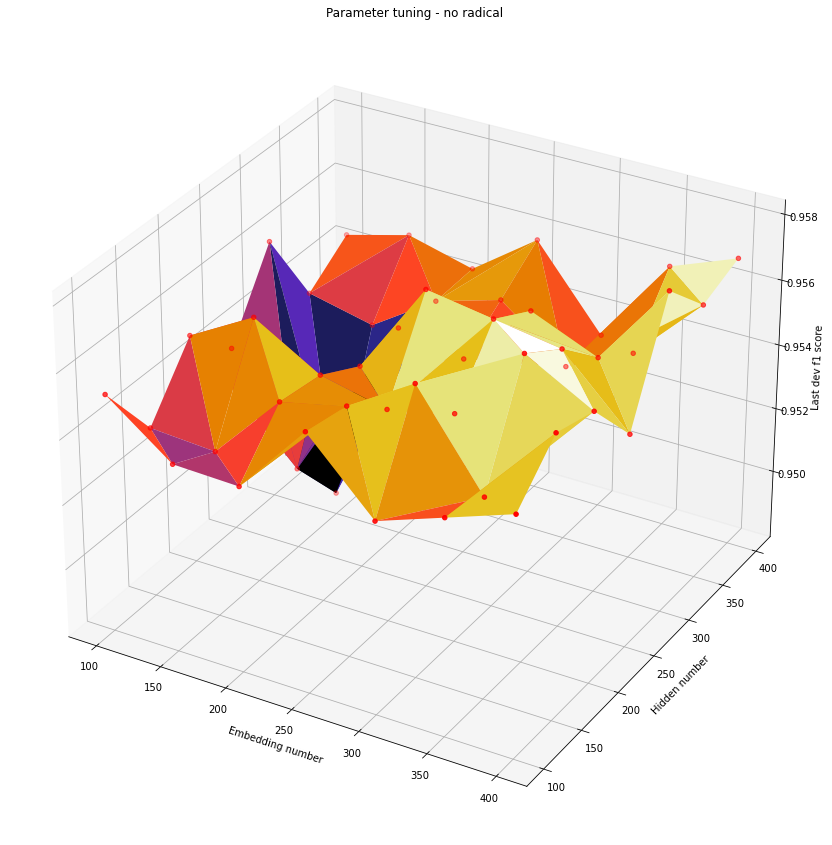

In [27]:
draw_plane(df_need3)

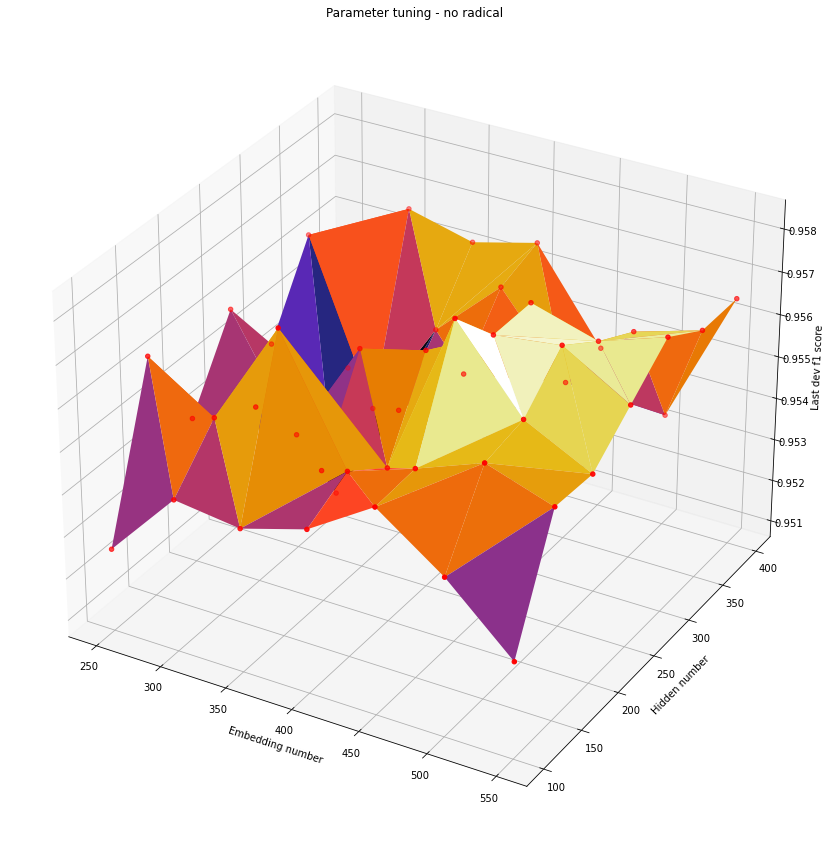

In [28]:
draw_plane(df_need4)

In [29]:
df_inter1 = df_need4.loc[df['config.embedding_num'] == 450]
df_inter2 = df_need4.loc[df['config.embedding_num'] == 500]
df_inter3 = df_need4.loc[df['config.embedding_num'] == 550]

frames = [df_need3, df_inter1, df_inter2, df_inter3]

result = pd.concat(frames)
result = result.sort_values(['config.hidden_num','config.embedding_num'], ascending=(True,True))
#["b", "c"], ascending = (False, True)
result[:3]

,last_train_loss,last_train_loss2,last_train_loss3,last_train_loss_ave,last_train_f1,last_train_f12,last_train_f13,last_train_f1_ave,last_dev_loss1,last_dev_loss2,last_dev_loss3,last_dev_loss_ave,last_dev_f11,last_dev_f12,last_dev_f13,last_dev_f1_ave,config.embedding_num,config.hidden_num
0,0.005640,0.004377,0.004287,0.004768,0.966452,0.966841,0.965714,0.966336,0.007762,0.005915,0.009823,0.007834,0.955197,0.955592,0.954408,0.955066,100,100
1,0.003563,0.002350,0.002251,0.002721,0.974648,0.973239,0.971764,0.973217,0.021806,0.009670,0.022962,0.018146,0.953684,0.956382,0.953355,0.954474,150,100
2,0.002650,0.001385,0.003227,0.002421,0.977250,0.975627,0.975520,0.976132,0.001700,0.000733,0.002148,0.001527,0.953618,0.954868,0.956316,0.954934,200,100


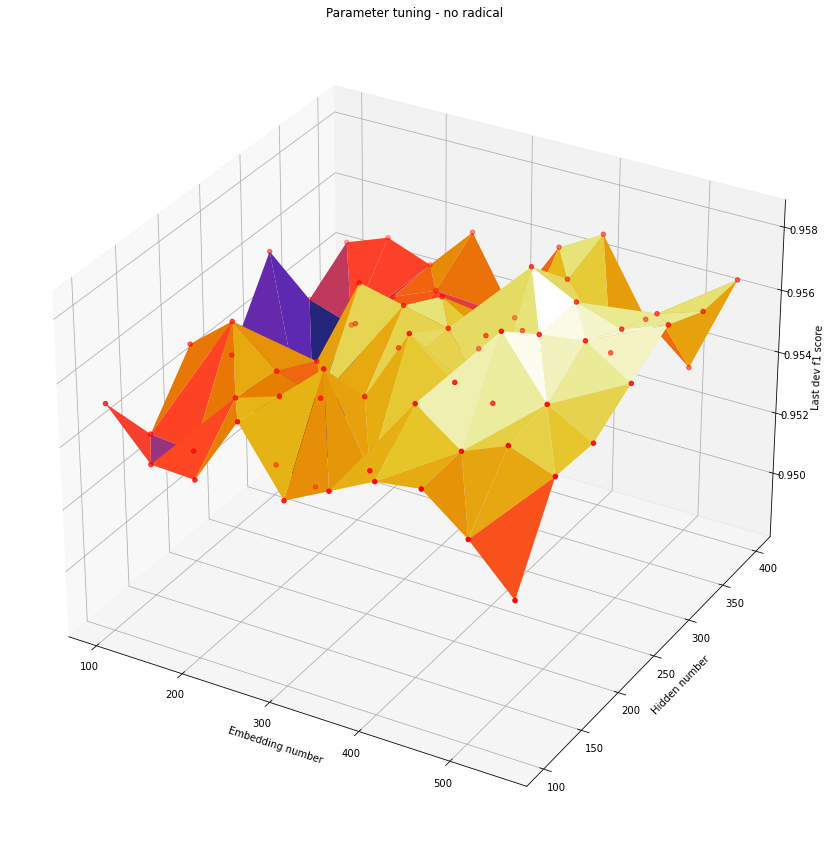

In [30]:
draw_plane(result)

In [36]:
result.sort_values(by=['last_dev_f11'], ascending=False)[:10]

,last_train_loss,last_train_loss2,last_train_loss3,last_train_loss_ave,last_train_f1,last_train_f12,last_train_f13,last_train_f1_ave,last_dev_loss1,last_dev_loss2,last_dev_loss3,last_dev_loss_ave,last_dev_f11,last_dev_f12,last_dev_f13,last_dev_f1_ave,config.embedding_num,config.hidden_num
18,0.000880,0.000867,0.000421,0.000722,0.992703,0.992569,0.991590,0.992287,0.029617,0.136657,0.020051,0.062108,0.958158,0.957303,0.957171,0.957544,450,200
34,0.000899,0.001756,0.000308,0.000988,0.994085,0.993736,0.994004,0.993941,0.009426,0.015285,0.005830,0.010180,0.957763,0.956579,0.958750,0.957697,400,300
19,0.000208,0.003285,0.000417,0.001303,0.991482,0.990490,0.990047,0.990673,0.015738,0.011568,0.012718,0.013342,0.957303,0.958026,0.956250,0.957193,350,200
26,0.000309,0.002927,0.000369,0.001202,0.993870,0.993964,0.994031,0.993955,0.265722,0.110810,0.128602,0.168378,0.957237,0.956250,0.956118,0.956535,500,250
34,0.000488,0.000288,0.000734,0.000503,0.995681,0.995104,0.994889,0.995225,0.068869,0.090233,0.125155,0.094753,0.957105,0.955263,0.955395,0.955921,550,300
24,0.000742,0.002196,0.000343,0.001093,0.990154,0.989564,0.988960,0.989560,0.003070,0.003950,0.029767,0.012262,0.957105,0.955263,0.956513,0.956294,250,250
32,0.001711,0.002627,0.000332,0.001557,0.994702,0.994380,0.993682,0.994254,0.005728,0.000884,0.009769,0.005460,0.957039,0.957632,0.955329,0.956667,450,300
25,0.000516,0.001190,0.000842,0.000849,0.994178,0.993119,0.993481,0.993593,0.004197,0.008724,0.008826,0.007249,0.957039,0.954868,0.956908,0.956272,450,250
48,0.002100,0.000201,0.000706,0.001002,0.995386,0.994648,0.994688,0.994907,0.163698,0.148165,0.251344,0.187736,0.956842,0.957039,0.950329,0.954737,400,400
11,0.002624,0.001285,0.003328,0.002412,0.986720,0.986385,0.985620,0.986242,0.000755,0.001003,0.000448,0.000735,0.956842,0.956447,0.954737,0.956009,300,150


In [37]:
result.sort_values(by=['last_dev_f1_ave'], ascending=False)[:10]

,last_train_loss,last_train_loss2,last_train_loss3,last_train_loss_ave,last_train_f1,last_train_f12,last_train_f13,last_train_f1_ave,last_dev_loss1,last_dev_loss2,last_dev_loss3,last_dev_loss_ave,last_dev_f11,last_dev_f12,last_dev_f13,last_dev_f1_ave,config.embedding_num,config.hidden_num
34,0.000899,0.001756,0.000308,0.000988,0.994085,0.993736,0.994004,0.993941,0.009426,0.015285,0.005830,0.010180,0.957763,0.956579,0.958750,0.957697,400,300
18,0.000880,0.000867,0.000421,0.000722,0.992703,0.992569,0.991590,0.992287,0.029617,0.136657,0.020051,0.062108,0.958158,0.957303,0.957171,0.957544,450,200
19,0.000208,0.003285,0.000417,0.001303,0.991482,0.990490,0.990047,0.990673,0.015738,0.011568,0.012718,0.013342,0.957303,0.958026,0.956250,0.957193,350,200
27,0.000698,0.000348,0.000285,0.000444,0.994393,0.994420,0.993937,0.994250,0.005796,0.012725,0.014167,0.010896,0.956316,0.956250,0.958026,0.956864,550,250
41,0.000438,0.000980,0.000392,0.000603,0.996030,0.995761,0.995681,0.995824,0.000471,0.001520,0.000272,0.000754,0.956513,0.957829,0.956053,0.956798,550,350
48,0.000111,0.000978,0.000510,0.000533,0.995869,0.995681,0.995600,0.995717,0.064166,0.140228,0.121980,0.108792,0.956513,0.956776,0.956974,0.956754,550,400
32,0.001711,0.002627,0.000332,0.001557,0.994702,0.994380,0.993682,0.994254,0.005728,0.000884,0.009769,0.005460,0.957039,0.957632,0.955329,0.956667,450,300
26,0.000309,0.002927,0.000369,0.001202,0.993870,0.993964,0.994031,0.993955,0.265722,0.110810,0.128602,0.168378,0.957237,0.956250,0.956118,0.956535,500,250
44,0.006416,0.000629,0.001415,0.002820,0.992274,0.991093,0.990597,0.991321,0.058679,0.006153,0.007419,0.024084,0.954342,0.956974,0.958158,0.956491,200,400
33,0.000201,0.000494,0.000356,0.000350,0.995091,0.994943,0.994460,0.994831,0.008618,0.011798,0.011626,0.010681,0.956579,0.956776,0.956053,0.956469,500,300


In [31]:
df = pd.read_csv('results_df_LSTM_CRF no radical_ave_large.csv')
df_need5= df[['last_train_loss','last_train_loss2','last_train_loss3','last_train_loss_ave', 'last_train_f1','last_train_f12','last_train_f13','last_train_f1_ave', 'last_dev_loss1', 'last_dev_loss2','last_dev_loss3','last_dev_loss_ave','last_dev_f11','last_dev_f12','last_dev_f13','last_dev_f1_ave', 'config.embedding_num', 'config.hidden_num']]

In [ ]:
0.958618
0.957982	

In [32]:
df_need5.sort_values(by=['last_dev_f11'], ascending=False)[:10]

,last_train_loss,last_train_loss2,last_train_loss3,last_train_loss_ave,last_train_f1,last_train_f12,last_train_f13,last_train_f1_ave,last_dev_loss1,last_dev_loss2,last_dev_loss3,last_dev_loss_ave,last_dev_f11,last_dev_f12,last_dev_f13,last_dev_f1_ave,config.embedding_num,config.hidden_num
26,0.007501,0.062518,0.018781,0.029600,0.996593,0.996030,0.995292,0.995971,0.629175,0.728271,0.319434,0.558960,0.959276,0.956513,0.957237,0.957675,500,200
6,0.135846,0.035815,0.039893,0.070518,0.991710,0.991133,0.990651,0.991165,0.017847,0.022009,0.027429,0.022428,0.958684,0.957105,0.957566,0.957785,400,100
71,0.028815,0.014362,0.015533,0.019570,0.997250,0.997304,0.997532,0.997362,0.008484,0.051331,0.013855,0.024556,0.958618,0.957237,0.958092,0.957982,500,450
35,0.008765,0.016132,0.015771,0.013556,0.996459,0.996244,0.996486,0.996396,0.821875,1.172217,0.870508,0.954867,0.957895,0.957632,0.957961,0.957829,500,250
44,0.044379,0.012927,0.011743,0.023016,0.997076,0.996673,0.996808,0.996852,1.178027,1.467481,0.949756,1.198421,0.957829,0.956974,0.959276,0.958026,500,300
62,0.026422,0.011591,0.007507,0.015173,0.997384,0.996968,0.997103,0.997152,0.115503,0.181238,0.069421,0.122054,0.957697,0.956250,0.959539,0.957829,500,400
16,0.038232,0.025586,0.063580,0.042466,0.994809,0.994500,0.993508,0.994272,0.053821,0.262195,0.131067,0.149028,0.957632,0.957237,0.956053,0.956974,450,150
17,0.008276,0.065436,0.021344,0.031685,0.995252,0.995010,0.994353,0.994871,0.020850,0.013318,0.036047,0.023405,0.957566,0.958618,0.958355,0.958180,500,150
8,0.080133,0.026044,0.051953,0.052710,0.992797,0.992260,0.991710,0.992256,0.053748,0.176685,0.075378,0.101937,0.957500,0.957895,0.958224,0.957873,500,100
34,0.014099,0.018414,0.054010,0.028841,0.996150,0.995949,0.996284,0.996128,0.255444,0.067737,0.249878,0.191020,0.957434,0.956908,0.956382,0.956908,450,250


In [33]:
df_need5.sort_values(by=['last_dev_f1_ave'], ascending=False)[:10]

,last_train_loss,last_train_loss2,last_train_loss3,last_train_loss_ave,last_train_f1,last_train_f12,last_train_f13,last_train_f1_ave,last_dev_loss1,last_dev_loss2,last_dev_loss3,last_dev_loss_ave,last_dev_f11,last_dev_f12,last_dev_f13,last_dev_f1_ave,config.embedding_num,config.hidden_num
17,0.008276,0.065436,0.021344,0.031685,0.995252,0.995010,0.994353,0.994871,0.020850,0.013318,0.036047,0.023405,0.957566,0.958618,0.958355,0.958180,500,150
44,0.044379,0.012927,0.011743,0.023016,0.997076,0.996673,0.996808,0.996852,1.178027,1.467481,0.949756,1.198421,0.957829,0.956974,0.959276,0.958026,500,300
71,0.028815,0.014362,0.015533,0.019570,0.997250,0.997304,0.997532,0.997362,0.008484,0.051331,0.013855,0.024556,0.958618,0.957237,0.958092,0.957982,500,450
8,0.080133,0.026044,0.051953,0.052710,0.992797,0.992260,0.991710,0.992256,0.053748,0.176685,0.075378,0.101937,0.957500,0.957895,0.958224,0.957873,500,100
35,0.008765,0.016132,0.015771,0.013556,0.996459,0.996244,0.996486,0.996396,0.821875,1.172217,0.870508,0.954867,0.957895,0.957632,0.957961,0.957829,500,250
62,0.026422,0.011591,0.007507,0.015173,0.997384,0.996968,0.997103,0.997152,0.115503,0.181238,0.069421,0.122054,0.957697,0.956250,0.959539,0.957829,500,400
6,0.135846,0.035815,0.039893,0.070518,0.991710,0.991133,0.990651,0.991165,0.017847,0.022009,0.027429,0.022428,0.958684,0.957105,0.957566,0.957785,400,100
26,0.007501,0.062518,0.018781,0.029600,0.996593,0.996030,0.995292,0.995971,0.629175,0.728271,0.319434,0.558960,0.959276,0.956513,0.957237,0.957675,500,200
31,0.124182,0.024445,0.064209,0.070945,0.995654,0.994165,0.994420,0.994746,0.190527,0.192212,0.168262,0.183667,0.956776,0.959342,0.956842,0.957654,300,250
7,0.113306,0.025781,0.054120,0.064402,0.991925,0.990530,0.990758,0.991071,0.140161,0.154810,0.049902,0.114958,0.957303,0.957632,0.957763,0.957566,450,100


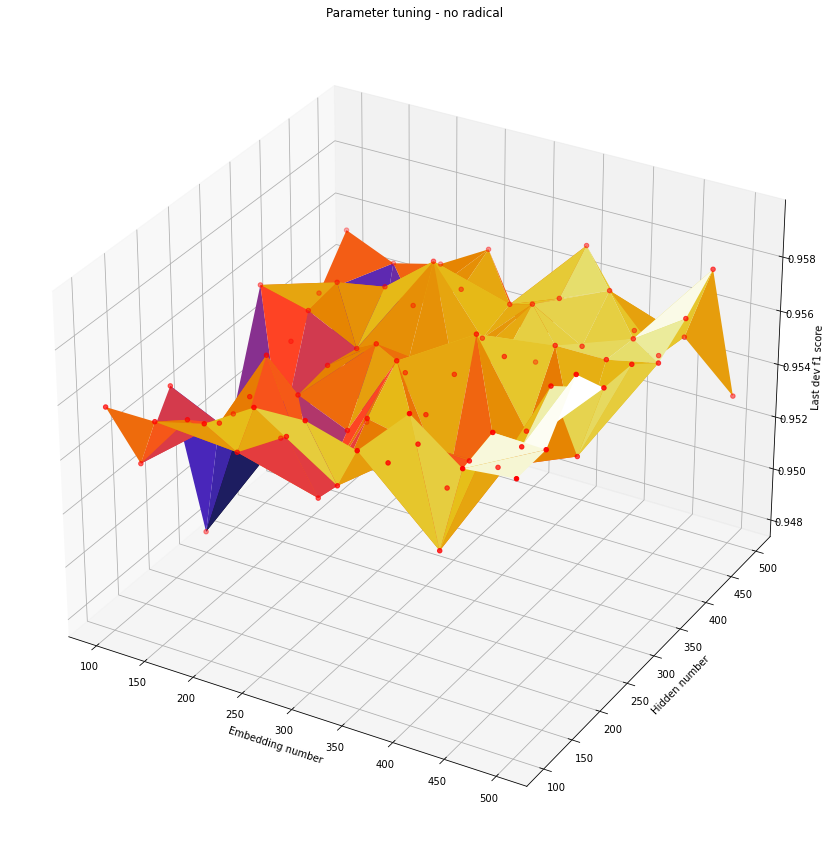

In [34]:
draw_plane(df_need5)

# for radical embedding 

In [41]:
df = pd.read_csv('results_df_LSTM one rad ave 10-100.csv')
df_need6= df[['last_train_loss','last_train_loss2','last_train_loss3','last_train_loss_ave', 'last_train_f1','last_train_f12','last_train_f13','last_train_f1_ave', 'last_dev_loss1', 'last_dev_loss2','last_dev_loss3','last_dev_loss_ave','last_dev_f11','last_dev_f12','last_dev_f13','last_dev_f1_ave', 'config.embedding_num', 'config.hidden_num',  'config.embedding_onerad_num']]
df_need6

,last_train_loss,last_train_loss2,last_train_loss3,last_train_loss_ave,last_train_f1,last_train_f12,last_train_f13,last_train_f1_ave,last_dev_loss1,last_dev_loss2,last_dev_loss3,last_dev_loss_ave,last_dev_f11,last_dev_f12,last_dev_f13,last_dev_f1_ave,config.embedding_num,config.hidden_num,config.embedding_onerad_num
0,0.000658,0.004249,0.001749,0.002219,0.994152,0.994514,0.993669,0.994111,0.026894,0.053162,0.053184,0.044413,0.956974,0.952434,0.954276,0.954561,400,300,10
1,0.000475,0.000533,0.009747,0.003585,0.994313,0.993950,0.992676,0.993646,0.023057,0.027220,0.073542,0.041273,0.953421,0.953882,0.952829,0.953377,400,300,20
2,0.000127,0.000171,0.001737,0.000678,0.994688,0.994178,0.994058,0.994308,0.003749,0.000251,0.009666,0.004555,0.957171,0.955987,0.953355,0.955504,400,300,30
3,0.000375,0.001630,0.000911,0.000972,0.994648,0.994567,0.993977,0.994397,0.023799,0.026877,0.018039,0.022905,0.956447,0.955987,0.953618,0.955351,400,300,40
4,0.000185,0.000456,0.000277,0.000306,0.995453,0.994903,0.994688,0.995015,0.060895,0.104317,0.081283,0.082165,0.954605,0.955987,0.954145,0.954912,400,300,50
5,0.000603,0.000532,0.000213,0.000449,0.995104,0.994527,0.994621,0.994751,0.074322,0.020397,0.006063,0.033594,0.955592,0.958618,0.956250,0.956820,400,300,60
6,0.000470,0.000152,0.002295,0.000972,0.995037,0.994326,0.994500,0.994621,0.091730,0.072596,0.098314,0.087547,0.956513,0.955526,0.957566,0.956535,400,300,70
7,0.000218,0.000250,0.005446,0.001971,0.995533,0.994916,0.994621,0.995023,0.065800,0.025005,0.033327,0.041377,0.954605,0.956184,0.954868,0.955219,400,300,80
8,0.001273,0.001077,0.000563,0.000971,0.994433,0.994822,0.994769,0.994675,0.002005,0.019834,0.000140,0.007326,0.955066,0.950395,0.954079,0.953180,400,300,90
9,0.000175,0.001997,0.000260,0.000811,0.995144,0.995010,0.994742,0.994965,0.096923,0.128074,0.118364,0.114454,0.958092,0.956645,0.958092,0.957610,400,300,100


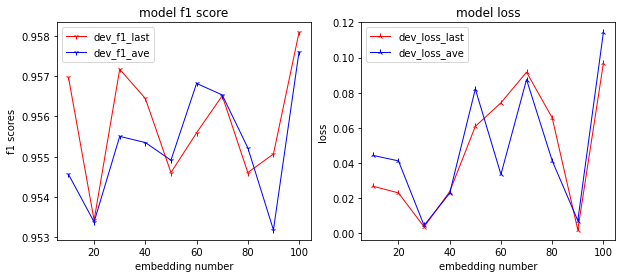

In [48]:
draw_graph(df_need6, True) # result: should go ++ 100

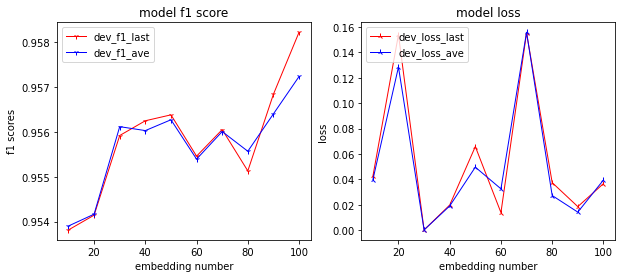

In [9]:
df = pd.read_csv('results_df_LSTM three rad ave 10-100.csv')
df_need7= df[['last_train_loss','last_train_loss2','last_train_loss3','last_train_loss_ave', 'last_train_f1','last_train_f12','last_train_f13','last_train_f1_ave', 'last_dev_loss1', 'last_dev_loss2','last_dev_loss3','last_dev_loss_ave','last_dev_f11','last_dev_f12','last_dev_f13','last_dev_f1_ave', 'config.embedding_num', 'config.hidden_num',  'config.embedding_threerad_num']]
# df_need7
draw_graph(df_need7, False) # result: should go ++ 100

In [ ]:
0.957763
0.957697

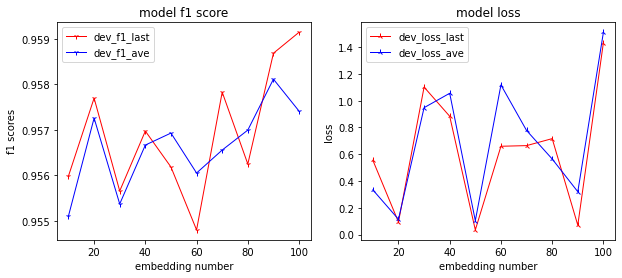

In [57]:
df = pd.read_csv('results_df_raw.csv') # CRF one rad 
df_need7= df[['last_train_loss','last_train_loss2','last_train_loss3','last_train_loss_ave', 'last_train_f1','last_train_f12','last_train_f13','last_train_f1_ave', 'last_dev_loss1', 'last_dev_loss2','last_dev_loss3','last_dev_loss_ave','last_dev_f11','last_dev_f12','last_dev_f13','last_dev_f1_ave', 'config.embedding_num', 'config.hidden_num',  'config.embedding_onerad_num']]
# df_need7
draw_graph(df_need7, True) # result: should go ++ 100

In [ ]:
0.958618
0.957982

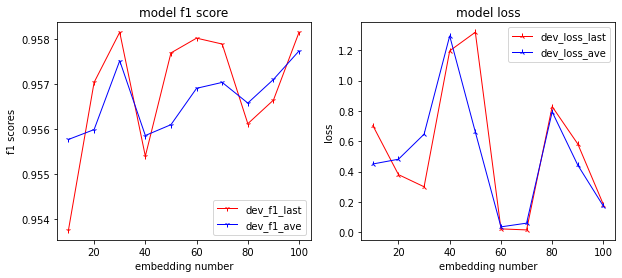

In [8]:
df = pd.read_csv('results_df_raw.csv') # CRF three rad 

df_need8= df[['last_train_loss','last_train_loss2','last_train_loss3','last_train_loss_ave', 'last_train_f1','last_train_f12','last_train_f13','last_train_f1_ave', 'last_dev_loss1', 'last_dev_loss2','last_dev_loss3','last_dev_loss_ave','last_dev_f11','last_dev_f12','last_dev_f13','last_dev_f1_ave', 'config.embedding_num', 'config.hidden_num',  'config.embedding_threerad_num']]
# df_need7
draw_graph(df_need8, False) # result: should go
